### Task 1: Image Formation and Geometric Transformations

This section demonstrates how to load, display, and perform geometric transformations (translation and rotation) on an image using Python and OpenCV.

In [12]:
# Import required libraries

import cv2
import numpy as np
from matplotlib import pyplot as plt

### Loading and Displaying an Image: I used `cv2.imread()` to load the image and `cv2.imshow()` to display it.

In [13]:
# Load the image (replace 'your_image.jpg' with your actual image file)

image = cv2.imread(r'D:\Computer vision\CV_practice_daily\Labrador Dog.jpg')
if image is None:
    print("Image not found.")
else:
    print("Image loaded successfully.")

Image loaded successfully.


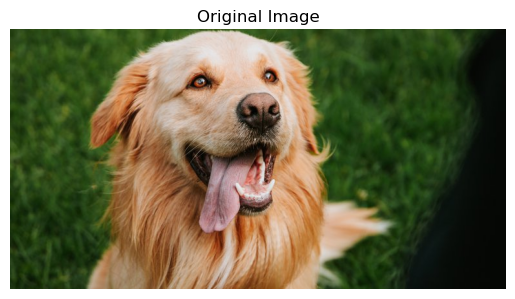

In [22]:
# Display the image using matplotlib (OpenCV uses BGR, matplotlib uses RGB)

if image is not None:
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.title('Original Image')
    plt.axis('off')
    plt.show

### Translation : The image was shifted using `cv2.warpAffine()`.

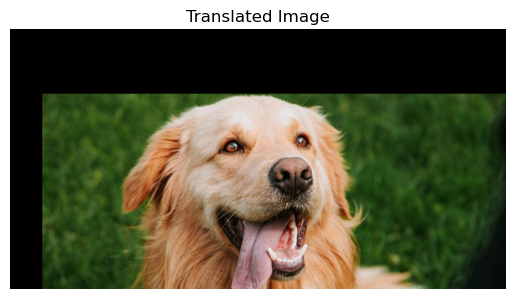

In [23]:
rows, cols = image.shape[:2]
translation_matrix = np.float32([[1, 0, 50], [0, 1, 100]])  # Shift right by 50, down by 100
translated_image = cv2.warpAffine(image_rgb, translation_matrix, (cols, rows))
plt.imshow(translated_image)
plt.title('Translated Image')
plt.axis('off')
plt.show()




### Rotation: We rotated the image by 30°, 45°, and 90° using `cv2.getRotationMatrix2D()`.

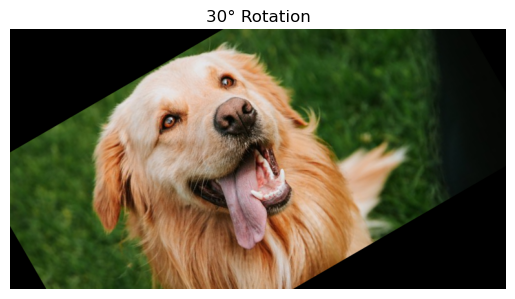

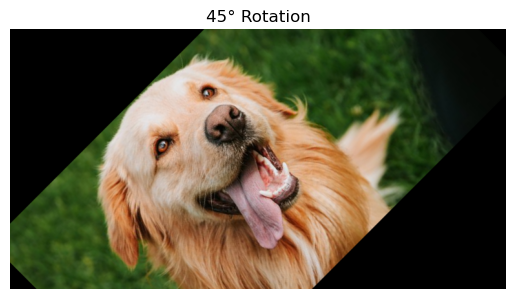

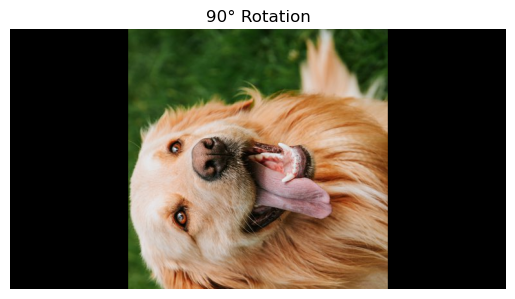

In [24]:
if image is None:
    print("Image not found.")
else:
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    rows, cols = image.shape[:2]
    center = (cols // 2, rows // 2)

    angles = [30, 45, 90]

    for angle in angles:
        M = cv2.getRotationMatrix2D(center, angle, 1.0)
        rotated = cv2.warpAffine(image, M, (cols, rows))
        plt.imshow(rotated)
        plt.title(f'{angle}° Rotation')
        plt.axis('off')
        plt.show()



In [25]:
# Convert from BGR (OpenCV default) to RGB (matplotlib expects RGB)
img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

height, width = image.shape[:2]

# Resize to half
resized_half = cv2.resize(img_rgb, (width // 2, height // 2), interpolation=cv2.INTER_AREA)
# Resize to double
resized_double = cv2.resize(img_rgb, (width * 2, height * 2), interpolation=cv2.INTER_LINEAR)

# Plot images
cv2.imshow('Original',image)
cv2.imshow('Half size',resized_half)
cv2.imshow('Double size',resized_double)

cv2.waitKey(5000)
cv2.destroyAllWindows()


In [19]:
print("Original size:", img_rgb.shape)
print("Half size:", resized_half.shape)
print("Double size:", resized_double.shape)


Original size: (402, 768, 3)
Half size: (201, 384, 3)
Double size: (804, 1536, 3)


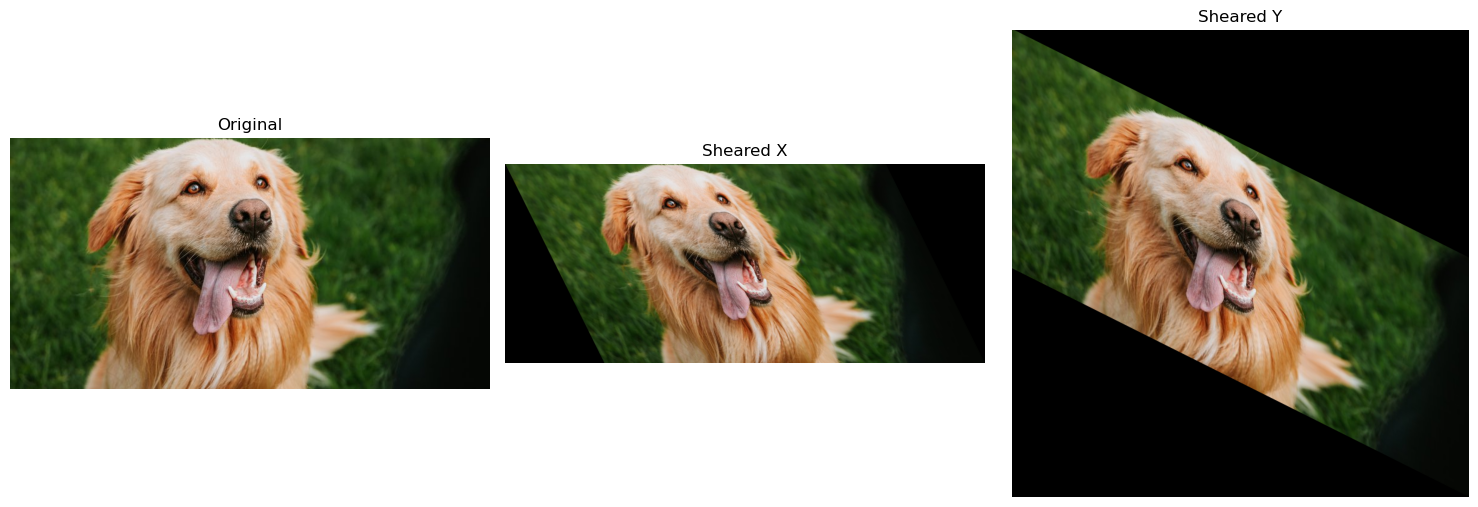

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread(r'D:\Computer vision\CV_practice_daily\Labrador Dog.jpg')
rows, cols = image.shape[:2]

# Shear along X-axis
shear_factor_x = 0.5
M_x = np.float32([
    [1, shear_factor_x, 0],
    [0, 1, 0]
])

sheared_x = cv2.warpAffine(image, M_x, (int(cols + shear_factor_x * rows), rows))

# Shear along Y-axis
shear_factor_y = 0.5
M_y = np.float32([
    [1, 0, 0],
    [shear_factor_y, 1, 0]
])

sheared_y = cv2.warpAffine(image, M_y, (cols, int(rows + shear_factor_y * cols)))

# Convert BGR to RGB for matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
sheared_x_rgb = cv2.cvtColor(sheared_x, cv2.COLOR_BGR2RGB)
sheared_y_rgb = cv2.cvtColor(sheared_y, cv2.COLOR_BGR2RGB)

# Plot original and sheared images
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title("Original")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(sheared_x_rgb)
plt.title("Sheared X")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(sheared_y_rgb)
plt.title("Sheared Y")
plt.axis('off')

plt.tight_layout()
plt.show()
